### 3. What is the highest paying programming language in 2018?

**Business Understanding** : Now we have come to the last question.
What is the income of the developers based on the programming language they use?
This might be one of the reasons why you want to learn programming languages, earn more of which is fine reason.
The library we will using is still same as the first and second question.
We will build bar chart just like question 1.

In [1]:
import pandas as pd
import numpy as np
import itertools
import matplotlib.pyplot as plt
%matplotlib inline

**Data Understanding** : For this question we use the data from Stackoverflow survey 2018. This data contains 98,855 repondents with so many information including language and salary. As you can see below the Salary information is in column 'ConvertedSalary' and language in the column 'LanguageWorkedWith'. For LanguageWorkedWith we do the same thing as the first and second question which is separate the language from list to item. We also need to clean the dataset from whitespaces.

In [2]:
# Read stackoverflow survey data 2018
df_2018 = pd.read_csv("./input/2018 Survey Result.csv")
df_2018['Year'] = '2018'

/home/jupyter/anaconda2/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2723: DtypeWarning: Columns (8,12,13,14,15,16,50,51,52,53,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df_2018.head()

,Respondent,Hobby,OpenSource,Country,Student,Employment,FormalEducation,UndergradMajor,CompanySize,DevType,...,Gender,SexualOrientation,EducationParents,RaceEthnicity,Age,Dependents,MilitaryUS,SurveyTooLong,SurveyEasy,Year
0,1,Yes,No,Kenya,No,Employed part-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Mathematics or statistics,20 to 99 employees,Full-stack developer,...,Male,Straight or heterosexual,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Black or of African descent,25 - 34 years old,Yes,NaN,The survey was an appropriate length,Very easy,2018
1,3,Yes,Yes,United Kingdom,No,Employed full-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)","A natural science (ex. biology, chemistry, phy...","10,000 or more employees",Database administrator;DevOps specialist;Full-...,...,Male,Straight or heterosexual,"Bachelor’s degree (BA, BS, B.Eng., etc.)",White or of European descent,35 - 44 years old,Yes,NaN,The survey was an appropriate length,Somewhat easy,2018
2,4,Yes,Yes,United States,No,Employed full-time,Associate degree,"Computer science, computer engineering, or sof...",20 to 99 employees,Engineering manager;Full-stack developer,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018
3,5,No,No,United States,No,Employed full-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",100 to 499 employees,Full-stack developer,...,Male,Straight or heterosexual,Some college/university study without earning ...,White or of European descent,35 - 44 years old,No,No,The survey was an appropriate length,Somewhat easy,2018
4,7,Yes,No,South Africa,"Yes, part-time",Employed full-time,Some college/university study without earning ...,"Computer science, computer engineering, or sof...","10,000 or more employees",Data or business analyst;Desktop or enterprise...,...,Male,Straight or heterosexual,Some college/university study without earning ...,White or of European descent,18 - 24 years old,Yes,NaN,The survey was an appropriate length,Somewhat easy,2018


In [4]:
df_2018.describe()

,Respondent,AssessJob1,AssessJob2,AssessJob3,AssessJob4,AssessJob5,AssessJob6,AssessJob7,AssessJob8,AssessJob9,...,JobEmailPriorities6,JobEmailPriorities7,ConvertedSalary,AdsPriorities1,AdsPriorities2,AdsPriorities3,AdsPriorities4,AdsPriorities5,AdsPriorities6,AdsPriorities7
count,98855.000000,66985.000000,66985.000000,66985.000000,66985.000000,66985.000000,66985.000000,66985.000000,66985.000000,66985.000000,...,46213.00000,46213.000000,4.770200e+04,60479.000000,60479.000000,60479.000000,60479.000000,60479.000000,60479.000000,60479.000000
mean,50822.971635,6.397089,6.673524,5.906875,4.065791,3.953243,4.407196,5.673181,4.225200,7.640009,...,4.97425,4.836388,9.578086e+04,2.726880,3.805784,3.340945,3.782470,4.383604,5.138809,4.821459
std,29321.650410,2.788428,2.531202,2.642734,2.541196,2.520499,2.502069,2.923998,2.507411,2.407457,...,1.86063,1.659844,2.023482e+05,1.881078,1.821323,1.673485,1.844864,1.931746,1.853249,1.874895
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.00000,1.000000,0.000000e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,25443.500000,4.000000,5.000000,4.000000,2.000000,2.000000,2.000000,3.000000,2.000000,6.000000,...,4.00000,4.000000,2.384400e+04,1.000000,2.000000,2.000000,2.000000,3.000000,4.000000,3.000000
50%,50823.000000,7.000000,7.000000,6.000000,4.000000,3.000000,4.000000,6.000000,4.000000,8.000000,...,5.00000,5.000000,5.507500e+04,2.000000,4.000000,3.000000,4.000000,5.000000,6.000000,5.000000
75%,76219.500000,9.000000,9.000000,8.000000,6.000000,6.000000,6.000000,8.000000,6.000000,10.000000,...,7.00000,6.000000,9.300000e+04,4.000000,5.000000,5.000000,5.000000,6.000000,7.000000,7.000000
max,101592.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,...,7.00000,7.000000,2.000000e+06,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000


In [7]:
df_2018.select_dtypes('object')

,Hobby,OpenSource,Country,Student,Employment,FormalEducation,UndergradMajor,CompanySize,DevType,YearsCoding,...,Gender,SexualOrientation,EducationParents,RaceEthnicity,Age,Dependents,MilitaryUS,SurveyTooLong,SurveyEasy,Year
0,Yes,No,Kenya,No,Employed part-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Mathematics or statistics,20 to 99 employees,Full-stack developer,3-5 years,...,Male,Straight or heterosexual,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Black or of African descent,25 - 34 years old,Yes,NaN,The survey was an appropriate length,Very easy,2018
1,Yes,Yes,United Kingdom,No,Employed full-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)","A natural science (ex. biology, chemistry, phy...","10,000 or more employees",Database administrator;DevOps specialist;Full-...,30 or more years,...,Male,Straight or heterosexual,"Bachelor’s degree (BA, BS, B.Eng., etc.)",White or of European descent,35 - 44 years old,Yes,NaN,The survey was an appropriate length,Somewhat easy,2018
2,Yes,Yes,United States,No,Employed full-time,Associate degree,"Computer science, computer engineering, or sof...",20 to 99 employees,Engineering manager;Full-stack developer,24-26 years,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018
3,No,No,United States,No,Employed full-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",100 to 499 employees,Full-stack developer,18-20 years,...,Male,Straight or heterosexual,Some college/university study without earning ...,White or of European descent,35 - 44 years old,No,No,The survey was an appropriate length,Somewhat easy,2018
4,Yes,No,South Africa,"Yes, part-time",Employed full-time,Some college/university study without earning ...,"Computer science, computer engineering, or sof...","10,000 or more employees",Data or business analyst;Desktop or enterprise...,6-8 years,...,Male,Straight or heterosexual,Some college/university study without earning ...,White or of European descent,18 - 24 years old,Yes,NaN,The survey was an appropriate length,Somewhat easy,2018
5,Yes,No,United Kingdom,No,Employed full-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",10 to 19 employees,Back-end developer;Database administrator;Fron...,6-8 years,...,Male,Straight or heterosexual,"Secondary school (e.g. American high school, G...",White or of European descent,18 - 24 years old,No,NaN,The survey was an appropriate length,Somewhat easy,2018
6,Yes,Yes,United States,No,Employed full-time,Some college/university study without earning ...,"Computer science, computer engineering, or sof...","10,000 or more employees",Back-end developer;Front-end developer;Full-st...,9-11 years,...,Male,Straight or heterosexual,"Master’s degree (MA, MS, M.Eng., MBA, etc.)",White or of European descent,18 - 24 years old,No,No,The survey was an appropriate length,Somewhat easy,2018
7,Yes,Yes,Nigeria,No,Employed full-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",10 to 19 employees,Designer;Front-end developer;QA or test developer,0-2 years,...,Female,NaN,Primary/elementary school,Black or of African descent,25 - 34 years old,No,NaN,The survey was too long,Somewhat difficult,2018
8,Yes,Yes,United States,No,Employed full-time,Some college/university study without earning ...,Fine arts or performing arts (ex. graphic desi...,100 to 499 employees,"Back-end developer;C-suite executive (CEO, CTO...",30 or more years,...,Male,Straight or heterosexual,Some college/university study without earning ...,White or of European descent,35 - 44 years old,Yes,No,The survey was an appropriate length,Very easy,2018
9,No,Yes,India,No,Employed full-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",500 to 999 employees,Designer,0-2 years,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018


In [10]:
df_2018.select_dtypes(include=('float','integer')).columns

Index([u'Respondent', u'AssessJob1', u'AssessJob2', u'AssessJob3',
       u'AssessJob4', u'AssessJob5', u'AssessJob6', u'AssessJob7',
       u'AssessJob8', u'AssessJob9', u'AssessJob10', u'AssessBenefits1',
       u'AssessBenefits2', u'AssessBenefits3', u'AssessBenefits4',
       u'AssessBenefits5', u'AssessBenefits6', u'AssessBenefits7',
       u'AssessBenefits8', u'AssessBenefits9', u'AssessBenefits10',
       u'AssessBenefits11', u'JobContactPriorities1', u'JobContactPriorities2',
       u'JobContactPriorities3', u'JobContactPriorities4',
       u'JobContactPriorities5', u'JobEmailPriorities1',
       u'JobEmailPriorities2', u'JobEmailPriorities3', u'JobEmailPriorities4',
       u'JobEmailPriorities5', u'JobEmailPriorities6', u'JobEmailPriorities7',
       u'ConvertedSalary', u'AdsPriorities1', u'AdsPriorities2',
       u'AdsPriorities3', u'AdsPriorities4', u'AdsPriorities5',
       u'AdsPriorities6', u'AdsPriorities7'],
      dtype='object')

**Data Preparation** : We only need information of the language that respondent worked with and the salary without involving unique respondents so that we only use 'LanguageWorkedWith' and 'ConvertedSalary' columns. We remove all the NULL ConvertedSalary (instead of refill it)  because we need to know the actual condition of salary they get, filling NULL values will not show actual condition. After that we split the list language into item then calculate the median of the salary

In [13]:
# include only necessary column
df_2018_lang_used = df_2018[['LanguageWorkedWith','ConvertedSalary']]

# remove missing values
df_2018_lang_used= df_2018_lang_used[df_2018_lang_used['ConvertedSalary'].notnull()]

In [14]:
def splitter(values):
    '''
    Description : split grouping values using semicolon (;) separator
    
    INPUT:
    values - each row in a dataframe
    
    OUTPUT:
    list - list that containing items (language) that have been split
    
    '''
    return list(itertools.product( *[str(v).split(';') for v in values]))

def expand(df):
    
    '''
    INPUT:
    df - a dataframe that contains grouping values inside a column/columns that needs to be splitted
    
    OUTPUT: 
    a fresh rebuild dataframe
    
    '''
    tuples=list()
    for i,row in df.iterrows():
        tuples.extend(splitter(row))
    return  pd.DataFrame.from_records(tuples,columns=df.columns)

In [15]:
# split grouped language
df_2018_lang_used = expand(df_2018_lang_used)

In [16]:
df_2018_lang_used['ConvertedSalary'] = (pd.to_numeric(df_2018_lang_used['ConvertedSalary'])).astype(int)

In [17]:
df_2018_group = pd.to_numeric(df_2018_lang_used['ConvertedSalary']).groupby(df_2018_lang_used['LanguageWorkedWith'])

In [18]:
# Find the median of each language. We are not using mean because the salary collected is from all over the world. 
# So in this case, using median will be more standardize than mean

df_2018_group = df_2018_group.median().reset_index()
df_2018_group.head()

,LanguageWorkedWith,ConvertedSalary
0,Assembly,43275.0
1,Bash/Shell,64866.0
2,C,46992.0
3,C#,59000.0
4,C++,50000.0


In [19]:
def plot_barh(df,x_col,y_col):
    '''
    INPUT:
    df- a dataframe that ready to be plotted, must contains x, y value
    x_col = column name that will become the index
    y_col = column name that will become the value
    
    OUTPUT:
    a bar chart
    '''
    x_pos = [i for i, _ in enumerate(df[x_col])]
    plt.figure(figsize=(10,10))
    plt.title('Salary per Programming Language',fontsize=20)
    plt.xlabel('Salary ($)', fontsize=12)
    plt.barh(x_pos,df[y_col])
    plt.yticks(x_pos, df[x_col])
    plt.show()

In [20]:
# for this analysis we need real condition not prediction so that all NULL values can be deleted
df_2018_group = df_2018_group[df_2018_group['ConvertedSalary']!='nan']

/home/jupyter/anaconda2/lib/python2.7/site-packages/pandas/core/ops.py:1649: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


In [21]:
df_2018_group = df_2018_group.sort_values('ConvertedSalary',ascending=True)

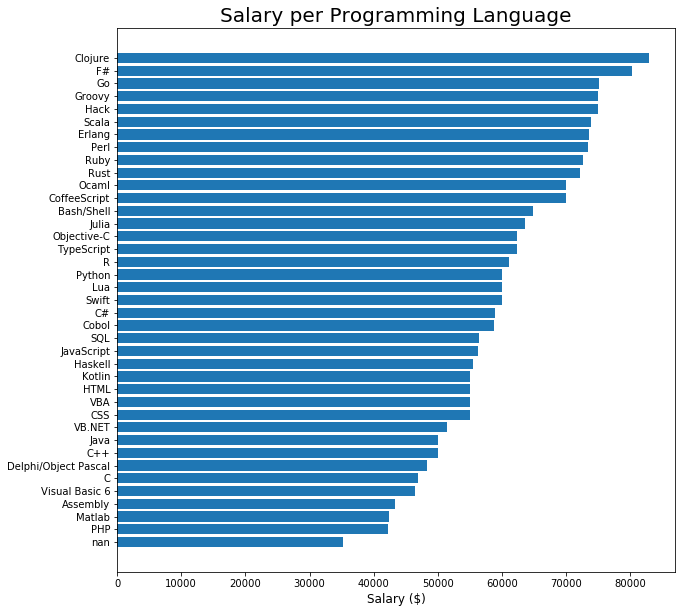

In [22]:
plot_barh(df_2018_group,'LanguageWorkedWith','ConvertedSalary')

**Result Evaluation** : Based on stackoverflow survey 2018, Clojure is the highest paying programming language with median salary more than $80.000. 